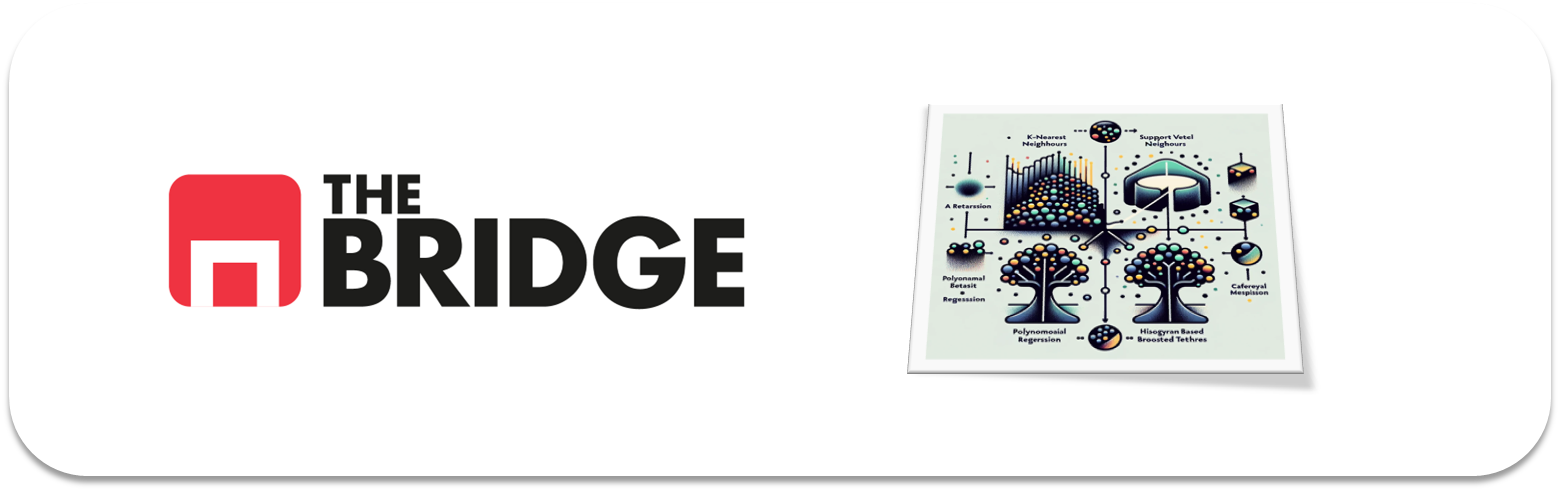

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [146]:
import bootcampviztools as bc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", delimiter = "|")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df["class"].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

In [7]:
# Variables objetivo
target_cat = "quality"
target_reg = "alcohol"

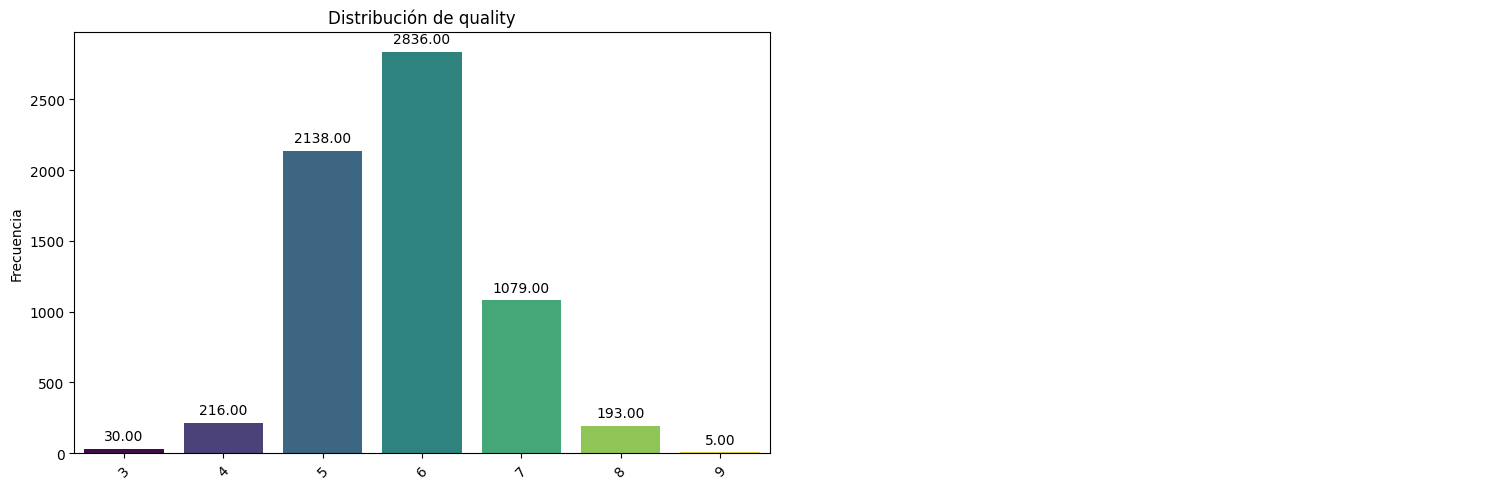

In [8]:
# Distribución de variable categórica
bc.pinta_distribucion_categoricas(df, [target_cat], relativa = False, mostrar_valores = True)

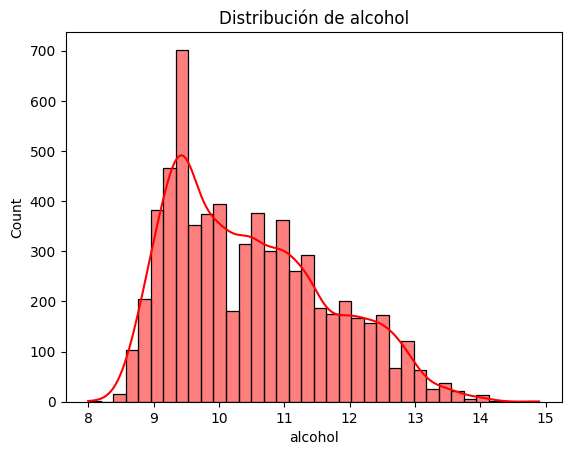

In [9]:
# Distribución de variable numérica
sns.histplot(df[target_reg], kde = True, color = "red")
plt.title(f"Distribución de {target_reg}");

(13, 2)


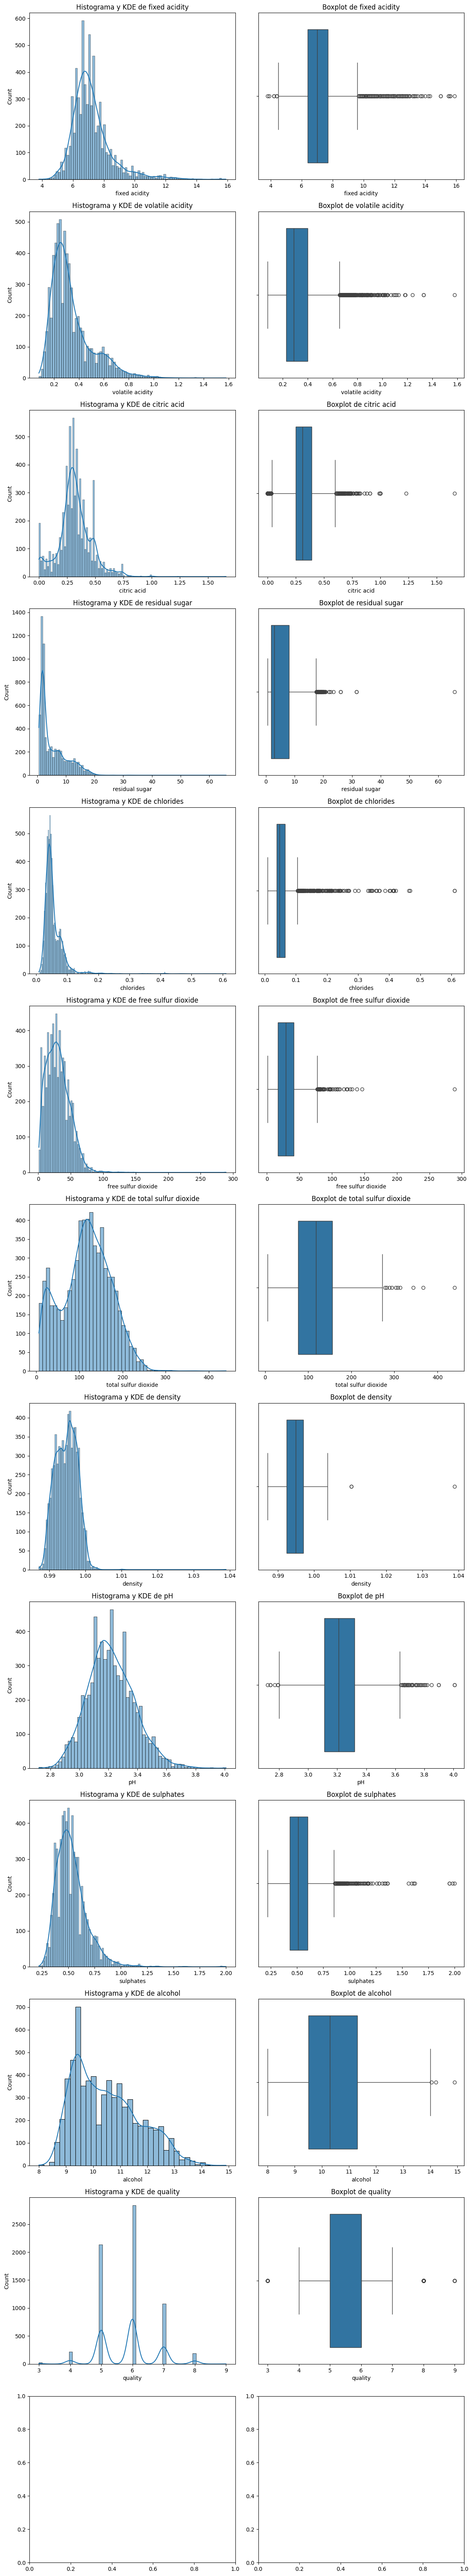

In [18]:
# Distribución de las variables
bc.plot_combined_graphs(df, df.columns, whisker_width=1.5, bins = None);

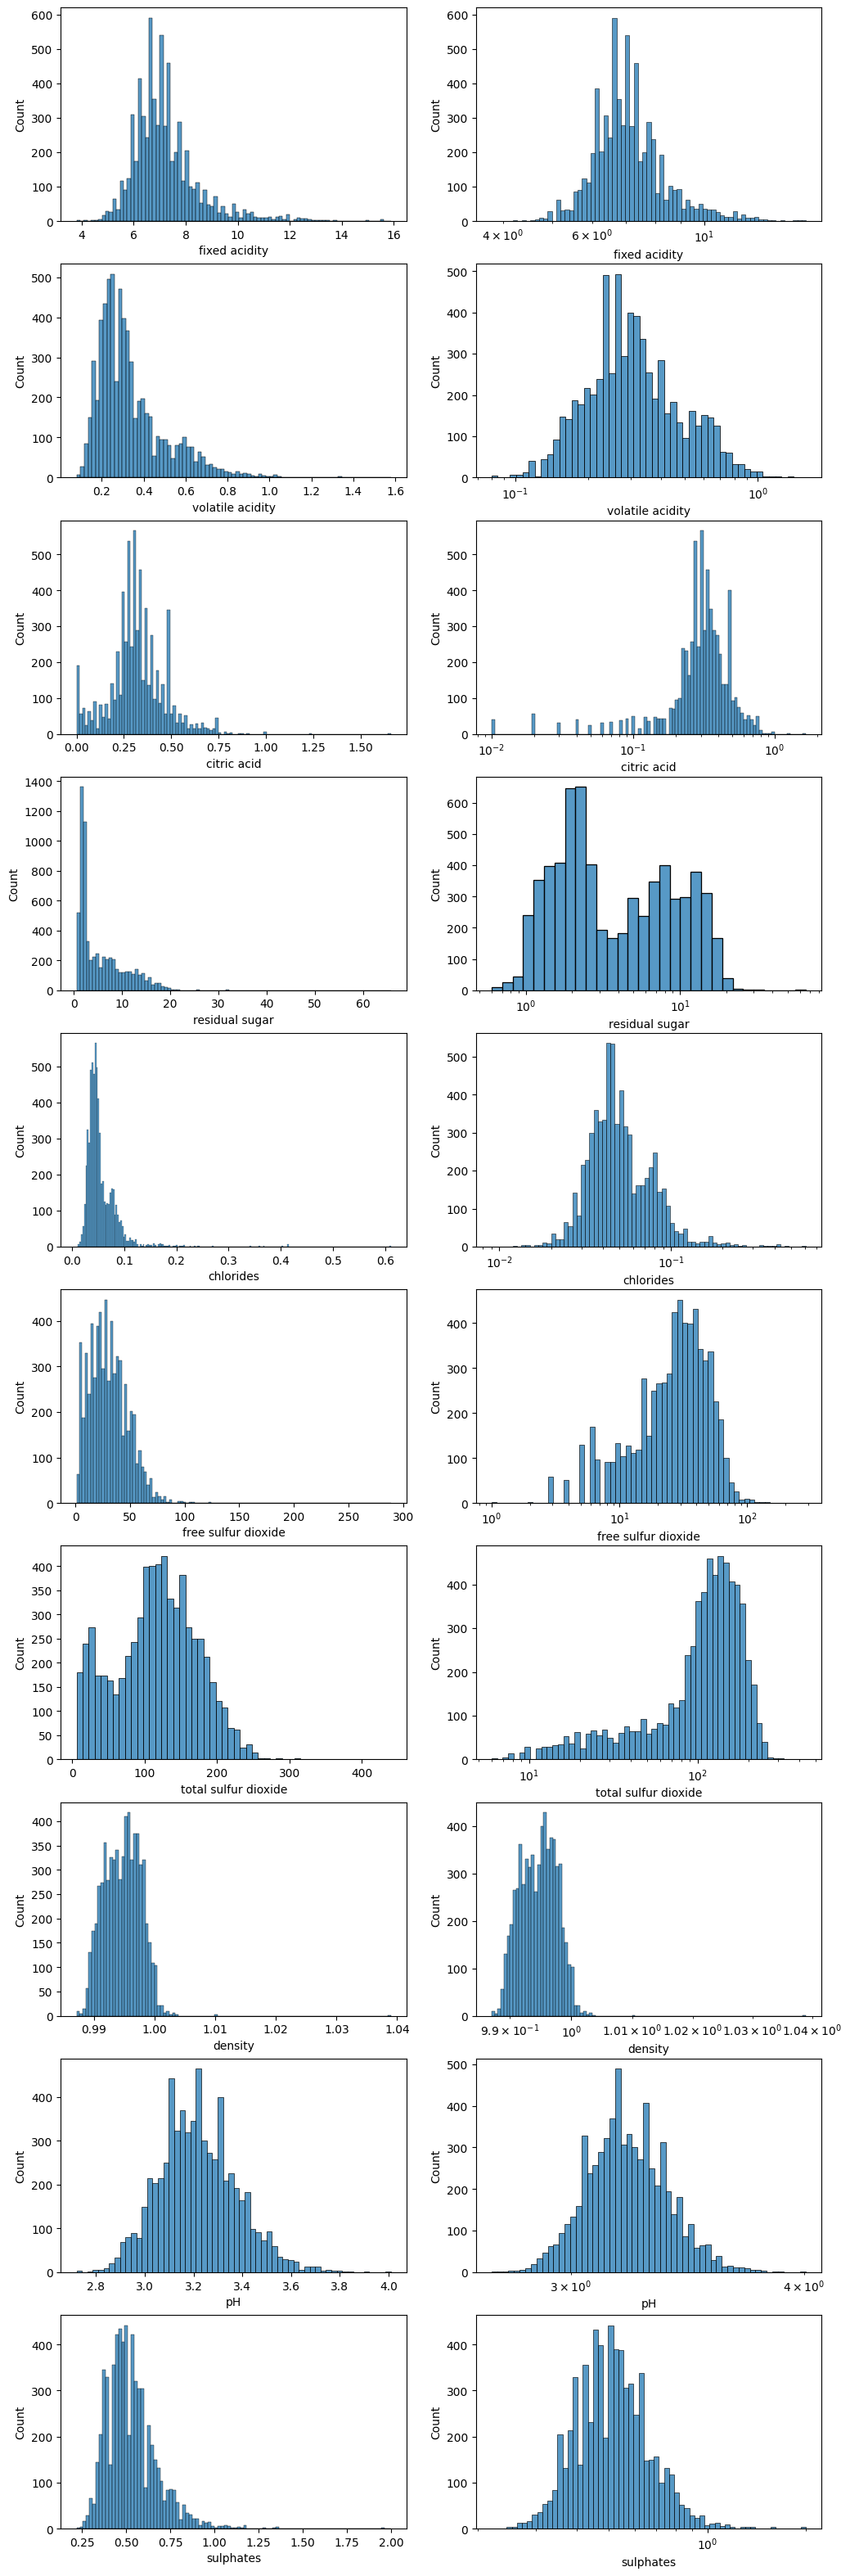

In [42]:
num_cols = len(df.columns[0:10])
fig, axs = plt.subplots (num_cols,2, figsize = (12,4*num_cols))
for row, col in enumerate(df.columns[0:10]):
    sns.histplot(df[col], ax = axs[row,0])
    sns.histplot(df[col], log_scale = 10, ax = axs[row,1]);

<div style="background-color: SeaShell;">
    
#### Evaluación inicial  
---
 

</div>

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

#### Preparo dos dataset, según la variable 'class'

In [92]:
df_w = df.loc[df["class"] == "white"]
df_white = df_w.drop(columns = "class")
df_r = df.loc[df["class"] == "red"]
df_red = df_r.drop(columns = "class")

### White wine

#### División Train/Test y Tratamiento de variables

In [93]:
# Divido train/test
train_set, test_set = train_test_split(df_white, test_size = 0.2, random_state = 42)
train_set_BackUp = train_set.copy()
test_set_BackUp = test_set.copy()

In [94]:
# Transformo con una raiz cuadrada
col_1r2 = ['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol']
for col in col_1r2:
    train_set[col] = np.sqrt(train_set[col])
    test_set[col] = np.sqrt(test_set[col])
    
# Transformo con una segunda raiz cuadrada
col_2r2 = ['fixed acidity','free sulfur dioxide','total sulfur dioxide','alcohol']
for col in col_2r2:
    train_set[col] = np.sqrt(train_set[col])
    test_set[col] = np.sqrt(test_set[col])
    
# Transformo con una tercera raiz cuadrada
col_3r2 = ['free sulfur dioxide','total sulfur dioxide']
for col in col_3r2:
    train_set[col] = np.sqrt(train_set[col])
    test_set[col] = np.sqrt(test_set[col])
    
# Transformo con una segunda raiz cúbica
col_2r3 = ['residual sugar']
for col in col_2r3:
    train_set[col] = np.cbrt(train_set[col])
    test_set[col] = np.cbrt(test_set[col])

In [95]:
train_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,1.616359,0.279059,0.334326,1.294542,0.045820,1.538865,1.841632,0.994016,1.784863,0.489454,1.798529,5.873150
std,0.049552,0.101454,0.120263,0.195057,0.021896,0.102311,0.076452,0.002921,0.042222,0.112871,0.052034,0.889038
min,1.396194,0.080000,0.000000,0.918386,0.009000,1.147203,1.316074,0.987110,1.649242,0.220000,1.681793,3.000000
25%,1.584292,0.210000,0.270000,1.092467,0.036000,1.479844,1.795469,0.991723,1.754993,0.410000,1.755622,5.000000
50%,1.614832,0.260000,0.320000,1.313051,0.043000,1.553942,1.844540,0.993800,1.783255,0.470000,1.795802,6.000000
75%,1.643731,0.320000,0.390000,1.465343,0.050000,1.609354,1.896005,0.996117,1.811077,0.550000,1.837495,6.000000
max,1.941208,1.100000,1.660000,1.778066,0.301000,2.030543,2.140088,1.010300,1.954482,1.080000,1.941208,9.000000


In [96]:
# Selecciono las columnas a tratar
#feat_scal = ['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH', 'sulphates', 'alcohol']
#feat_nscal = ['volatile acidity','citric acid','chlorides','density','quality']
feat_scal = train_set.columns.tolist()
feat_scal.remove("quality")

In [97]:
# Extraigo el target
X_train = train_set.copy()
X_train.drop(columns = target_cat, inplace = True)
y_train = train_set[target_cat]

X_test = test_set.copy()
X_test.drop(columns = target_cat, inplace = True)
y_test = test_set[target_cat]

In [98]:
# Aplico StandarScaler a las columnas seleccionadas
scaler = StandardScaler()
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scal = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [99]:
X_train_scal.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03
mean,5.413400e-15,-7.254137e-17,7.979551e-17,1.712883e-15,-1.468963e-16,6.247626e-16,-3.200888e-16,-7.573319e-15,1.556466e-15,-6.347370e-17,-2.187122e-15
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00
min,-4.443722e+00,-1.962319e+00,-2.780307e+00,-1.928689e+00,-1.681757e+00,-3.828646e+00,-6.875249e+00,-2.364307e+00,-3.212483e+00,-2.387572e+00,-2.243753e+00
25%,-6.472433e-01,-6.807850e-01,-5.349463e-01,-1.036114e+00,-4.485143e-01,-5.769475e-01,-6.038902e-01,-7.852676e-01,-7.075329e-01,-7.040231e-01,-8.247082e-01
50%,-3.083844e-02,-1.878873e-01,-1.191387e-01,9.490328e-02,-1.287848e-01,1.473896e-01,3.804551e-02,-7.405813e-02,-3.806805e-02,-1.723760e-01,-5.241782e-02
75%,5.524538e-01,4.035898e-01,4.629919e-01,8.757583e-01,1.909447e-01,6.890604e-01,7.113044e-01,7.193127e-01,6.209508e-01,5.364869e-01,7.489670e-01
max,6.556613e+00,8.092793e+00,1.102450e+01,2.479204e+00,1.165553e+01,4.806348e+00,3.904345e+00,5.574537e+00,4.017832e+00,5.232703e+00,2.742409e+00


#### KNN

In [101]:
### KNN de k = 100
knn = KNeighborsClassifier(n_neighbors = 100, weights = "distance")
knn.fit(X_train_scal,y_train)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [102]:
# Validación cruzada
scores = cross_val_score(knn, X_train_scal, y_train, scoring = "balanced_accuracy", cv = 4)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.33837068 0.32551029 0.33595431 0.33813973]
average score: 0.3344937518082749


In [103]:
# KNN de k = 50
knn = KNeighborsClassifier(n_neighbors = 50, weights = "distance")
knn.fit(X_train_scal,y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

In [104]:
# Validación cruzada
scores = cross_val_score(knn, X_train_scal, y_train, scoring = "balanced_accuracy", cv = 4)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.33853101 0.3257965  0.34027652 0.34783267]
average score: 0.3381091735606729


In [105]:
### KNN de k = 10
knn = KNeighborsClassifier(n_neighbors = 10, weights = "distance")
knn.fit(X_train_scal,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [106]:
# Validación cruzada
scores = cross_val_score(knn, X_train_scal, y_train, scoring = "balanced_accuracy", cv = 4)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.35111043 0.34640958 0.35622129 0.36058183]
average score: 0.353580783684534


In [109]:
# Predicción KNN
prediccionKNN = knn.predict(X_test_scal)
print(classification_report(y_test, prediccionKNN))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.70      0.22      0.33        32
           5       0.68      0.70      0.69       282
           6       0.66      0.71      0.69       460
           7       0.55      0.59      0.57       163
           8       0.85      0.27      0.41        41
           9       0.00      0.00      0.00         1

    accuracy                           0.65       980
   macro avg       0.49      0.35      0.38       980
weighted avg       0.66      0.65      0.64       980



S:\Users\NewWalhalla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\Users\NewWalhalla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\Users\NewWalhalla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

#### Regresión Logística

In [110]:
log_reg = LogisticRegression(max_iter = 2000, class_weight = "balanced", random_state = 42)
log_reg.fit(X_train_scal, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [111]:
# Validación cruzada
scores = cross_val_score(log_reg, X_train_scal, y_train, scoring = "balanced_accuracy", cv = 4)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.37126565 0.33869033 0.44245019 0.24705774]
average score: 0.3498659781536381


In [112]:
# Predicción LR
prediccionLR = log_reg.predict(X_test_scal)
print(classification_report(y_test, prediccionLR))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.21      0.59      0.31        32
           5       0.50      0.43      0.46       282
           6       0.65      0.23      0.35       460
           7       0.31      0.28      0.29       163
           8       0.12      0.51      0.19        41
           9       0.05      1.00      0.10         1

    accuracy                           0.32       980
   macro avg       0.26      0.44      0.24       980
weighted avg       0.51      0.32      0.36       980



#### Gradient Boost Classifier

In [113]:
gbc = GradientBoostingClassifier(random_state = 42, n_estimators = 200)
gbc.fit(X_train_scal, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [114]:
# Validación cruzada
scores = cross_val_score(gbc, X_train_scal, y_train, scoring = "balanced_accuracy", cv = 4)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.33631152 0.33048374 0.32853363 0.33104203]
average score: 0.33159272827979575


In [116]:
# Predicción GBC
prediccionGBC = gbc.predict(X_test_scal)
print(classification_report(y_test, prediccionGBC))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.70      0.22      0.33        32
           5       0.66      0.66      0.66       282
           6       0.64      0.75      0.69       460
           7       0.62      0.49      0.55       163
           8       0.50      0.22      0.31        41
           9       0.00      0.00      0.00         1

    accuracy                           0.64       980
   macro avg       0.45      0.33      0.36       980
weighted avg       0.64      0.64      0.63       980



#### Mejora de GBC

In [117]:
# Aplico SMOTE
smote = SMOTE(random_state = 42, k_neighbors = 3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scal, y_train)

In [118]:
gbc_smote = GradientBoostingClassifier(random_state = 42, n_estimators = 200)
gbc_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [119]:
parametros = {'learning_rate': [0.2, 0.5, 1],
              'n_estimators': [50, 100, 200, 500],
              'max_depth': [3, 6, 12],
              'subsample': [0.2,0.5,1]         
          }

clasificador = RandomizedSearchCV(estimator = gbc_smote,
                        cv = 3,
                        n_iter = 10,
                        param_distributions = parametros,
                        scoring = 'balanced_accuracy' 
                        )

clasificador.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(n_estimators=200,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.2, 0.5, 1],
                                        'max_depth': [3, 6, 12],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.2, 0.5, 1]},
                   scoring='balanced_accuracy')

In [120]:
clasificador.best_params_

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.2}

In [121]:
# Predicción con Gradient Boost Classifier tras optimizar hiperparámetros
prediccionFinal = clasificador.predict(X_test_scal)
print(classification_report(y_test,prediccionFinal))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.54      0.41      0.46        32
           5       0.67      0.72      0.70       282
           6       0.71      0.72      0.72       460
           7       0.61      0.60      0.60       163
           8       0.70      0.39      0.50        41
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.46      0.40      0.43       980
weighted avg       0.68      0.67      0.67       980



### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [134]:
# Rescato los train/test originales
train_set = train_set_BackUp.copy()
test_set = test_set_BackUp.copy()

In [135]:
# Extraigo el target
X_train = train_set.copy()
X_train.drop(columns = target_reg, inplace = True)
y_train = train_set[target_reg]

X_test = test_set.copy()
X_test.drop(columns = target_reg, inplace = True)
y_test = test_set[target_reg]

In [136]:
# Comparo modelos
treer = DecisionTreeRegressor(random_state = 42)
ranfr = RandomForestRegressor(random_state = 42)
xgbr = XGBRegressor(random_state = 42)

model_names = ["DecisionTree","Random Forest","XGBoost"]
model_set = [treer,ranfr,xgbr]

In [137]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Regresion Lineal":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "neg_mean_squared_error")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

DecisionTreeRegressor(random_state=42)
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [138]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <DecisionTree>, RMSE_CV: 0.5239479399366173
Model <Random Forest>, RMSE_CV: 0.3724413764491554
Model <XGBoost>, RMSE_CV: 0.3541318616331617
El ganador es XGBoost


#### XGB Regressor

In [140]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [158]:
prediccion = xgbr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, prediccion))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediccion)))

MAE: 0.2139193408343257
RMSE: 0.30755754422266024


In [144]:
# El error cuadrático medio del Test ha mejorado el resultado del Train
# Voy a buscar los mejores parámetros

In [169]:
parametros = {
    "n_estimators": [100,200,400],
    "max_depth": [None,2,4,10],
    "learning_rate": [0.1,0.2, 0.5, 1]
}

xgbr_param = GridSearchCV(xgbr,
                       param_grid = parametros,
                       cv = 5,
                       scoring = "neg_mean_squared_error",
                       n_jobs = -1)

xgbr_param.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [None, 2, 4, 10],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_squared_error')

In [170]:
prediccion_param = xgbr_param.predict(X_test)
print("MAE:", mean_absolute_error(y_test, prediccion_param))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediccion_param)))

MAE: 0.2145935388162833
RMSE: 0.29965436809775403


In [171]:
xgbr_param.best_score_

np.float64(-0.1020524596737193)

#### Random Forest

In [172]:
ranfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [173]:
prediccion2 = ranfr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, prediccion2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediccion2)))

MAE: 0.2301087868480725
RMSE: 0.3414206902679443


<div style="background-color: SeaShell;">
    
El error cuadrático medio del Test también ha mejorado el resultado del Train, peor no el resultado del modelo anterior.  
Voy a buscar los mejores parámetros

</div>


In [174]:
parametros2 = {
    "n_estimators": [100,200,400],
    "max_depth": [None,2,4,10],
    "max_features": [1.0,"sqrt","log2",None],
    "max_samples": [None,0.3,0.6,1]    
}

ranfr_param = GridSearchCV(ranfr,
                       param_grid = parametros2,
                       cv = 5,
                       scoring = "neg_mean_squared_error",
                       n_jobs = -1)

ranfr_param.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 10],
                         'max_features': [1.0, 'sqrt', 'log2', None],
                         'max_samples': [None, 0.3, 0.6, 1],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_squared_error')

In [175]:
prediccion2_param = ranfr_param.predict(X_test)
print("MAE:", mean_absolute_error(y_test, prediccion2_param))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediccion2_param)))

MAE: 0.22735159079405676
RMSE: 0.33809008454294104


In [176]:
ranfr_param.best_score_

np.float64(-0.12494716589993819)

<div style="background-color: SeaShell;">
    
Mantengo el modelo **XGBRegressor** como mejor opción.

</div>
